**The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities.**

#Big Mart Sales Prediction/5 steps for this Project#
**1.Hypothesis Generation**– understanding the problem better by brainstorming possible factors that can impact the outcome

**2.Data Exploration–** looking at categorical and continuous feature summaries and making inferences about the data.

**3.Data Cleaning–** imputing missing values in the data and checking for outliers

**4.Feature Engineering** – modifying existing variables and creating new ones for analysis

**5.Model Building–** making predictive models on the data


**---LOL---**

Machine Learning refers to the techniques involved in dealing with vast data in the most intelligent fashion (by developing algorithms) to derive actionable insights.  **Teaching someone how to dance is Machine Learning. And using someone to find best dance centers in the city is Data Mining. Easy!**

In [0]:
#Big Mart Project
import pandas as pd
import numpy as np

In [3]:
#load the data
from google.colab import files    
uploaded = files.upload()     

Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [0]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [0]:
#combine them into a dataframe ‘data’ with a source column
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index=True)

In [6]:
# 3 dataset shape
train.shape, test.shape, data.shape

((8523, 13), (5681, 12), (14204, 13))

In [7]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


In [8]:
#checking missing values
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

**#missing values Item_Outlet_sales are in the test set.**





1.item_visibility has min of 0

2.Establishment_Year format not right

3.count indicates there are missing values in Item_Weight and outlet_sales 

In [9]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [11]:
#check the unique values in categorical variables
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

1.there are total 1559 items & 10 outlets

2.item_type has 16 unique values

In [0]:
#explore further using the frenquency  in each categorical values
###code needs to be improved here###

#filter categorical variables
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x]=='object']

#exclude Item, Outlet, source columns
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'Outlet_Identifier', 'source']]


In [13]:
#print frequency of each category
for col in categorical_columns:
  print('\nFrequency of Categories for variable %s' %col)
  print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for variable Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int6

1.item_fat_content indicator is not consistent

2.item_type has 280 others. should the type better combined instead?

3.there are 3 supermarket types, need further investigation 

In [14]:
#impute missing value, item_weight/outlet_size/item_outlet_sales
data.apply(lambda x: sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [0]:
#impute mean item_weight to missing values
data['Item_Weight'] = data['Item_Weight'].fillna((data['Item_Weight'].mean()))

In [16]:
#count missing value after imputation
data['Item_Weight'].isnull().sum()

0

In [0]:
#impute outlet_size missing value with mode function
data['Outlet_Size'] = data['Outlet_Size'].fillna((data['Outlet_Size'].mode()[0]))


In [18]:
data['Outlet_Size'].isnull().sum()

0

In [19]:
#feature engineering/consider combing outlet_type ?????
data.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type')
#super market type has signifcate differences in sales. drop the idea of combining them#

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,339.828500
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3694.038558


In [20]:
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn  as sb
#barchart xlabel needs to be updated later#


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline
rcParams['figure.figsize']=7,5
plt.style.use('seaborn-whitegrid')

<BarContainer object of 14204 artists>

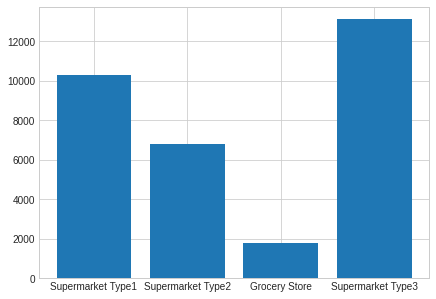

In [22]:
plt.bar(data['Outlet_Type'], data['Item_Outlet_Sales'])


In [23]:
#noticed there were 0s in the item_visibility, so count the total 0 value
(data['Item_Visibility']== 0).value_counts()

False    13325
True       879
Name: Item_Visibility, dtype: int64

In [0]:
New_Item_Visibility = (data['Item_Visibility'] == 0)
data.loc[New_Item_Visibility, 'Item_Visibility'] = data['Item_Visibility'].mean()

In [25]:
#all the 0 values has been filled 
(data['Item_Visibility']== 0).value_counts()

False    14204
Name: Item_Visibility, dtype: int64

In [26]:
#get the first two characters of ID:
data['Item_Identifier'].apply(lambda x : x[0:2]).value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [27]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x : x[0:2])

#rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food', 'NC':'Non-Consumable', 'DR': 'Drink'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drink              1317
Name: Item_Type_Combined, dtype: int64

In [0]:
#years of operation of a store
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year']


In [29]:
#typos and difference in representation in categories of Item_Fat_Content
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [30]:
#replace incorrect labels
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg':'Regular', 'low fat': 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [0]:
#Mark non-consumables as separate category in low_fat:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"

In [32]:
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [0]:
#Import library:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
le = LabelEncoder()
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [0]:
#One Hot Coding:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Outlet'])

In [38]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [37]:
data[['Item_Fat_Content_0','Item_Fat_Content_1','Item_Fat_Content_2']].head(10)

,Item_Fat_Content_0,Item_Fat_Content_1,Item_Fat_Content_2
0,1,0,0
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
5,0,0,1
6,0,0,1
7,1,0,0
8,0,0,1
9,0,0,1


In [0]:
#Drop the columns which have been converted to different types:
data.drop(['Item_Type', 'Outlet_Establishment_Year' ], axis=1, inplace =True)

In [40]:
#Divide into test and train:
train = data.loc[data['source'] == 'train']
test = data.loc[data['source'] == 'test']

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales', 'source'], axis=1, inplace = True)
train.drop(['source'], axis=1, inplace=True)

#Export files as modified versions:
train.to_csv('train_modified.csv', index=False)
test.to_csv('test_modified.csv', index=False)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
#Mean based:
mean_sales = train['Item_Outlet_Sales'].mean()

#Define a dataframe with IDs for submission:
base1 = test[['Item_Identifier', 'Outlet_Identifier']]
base1['Item_Outlet_Sales'] = mean_sales

#Export submission file
base1.to_csv('alg0.csv', index =False)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
